In [1]:
# Importing Pandas and Numpy for data analysis

# Data processing
import pandas as pd

# Linear algebra
import numpy as np


# Data Visualizsation 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 


In [2]:
# setup the Train csv file as Training DataFrame

train_df = pd.read_csv('train.csv')

In [3]:
# checking the First 10 records of the DataFrame

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# checking the last 10 records of the DataFrame

train_df.tail(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
# Some general info of the DataFrame

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Looking at the Information from the DataFrame we can infer about the things mentioned as below:
# 1. "Age" column is missing few values.
# 2. "Cabin" column is missing most of the values. this column can be neglected as it is having almost 77% missing values 
#     and which might lead to errorneous predictions.
# 3. "Embarked" column is missing couple of values so we will try to impute those values using certain parameters 
#     and methods later on.

In [7]:
# Getting the statistical insight of the DataFrame
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Dropping the cabin column frome the DataFrame

train_df.drop("Cabin", axis=1 , inplace= True)

#Confirming that the "Cabin" column is dropped

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# So looking at the dataframe above and from the description of all the parameters already provided in the problem,
# the things which we can think of and correlate to survival/death are

# 1. Whether they were travelling alone or with Family or with Friends something like that and how many of them?
# 2. People who had the same ticket number died together or few of them survived or what?
# 3. We know the Gender of the person and whether they were travelling alone or not from SibSp and 
#    Parch but the ones who were travelling alone were young/old/kids or what? 

In [10]:
# Trying to explore the "Name" column so that we can get the information about their prefix like "Mr", "Mrs", "Miss" etc.
# Below function will hold the prefix from the "Name" column for example "Mrs." from  
# "Futrelle, Mrs. Jacques Heath (Lily May Peel)

def name_prefix(prefix):
    
    prefix = prefix.split(",")[1].split(".")[0].lstrip()
    return prefix

In [11]:
# Creating a new column "Prefix" which will have all the values like "Mr", "Mrs", "Miss", "Master", etc.

train_df["Prefix"] = train_df["Name"].apply(name_prefix)

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs


In [12]:
# Checking for the Different prefixes which are available in the "Name" column

train_df["Prefix"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
the Countess      1
Lady              1
Jonkheer          1
Don               1
Mme               1
Name: Prefix, dtype: int64

In [13]:
# As we can see the major count Prefix's are "Mr", "Miss", "Mrs" & "Master" and the rest of them we can club
# them in "Other" category

# Applying simple for loop which will do it 

for i in range(len(train_df)):
    if train_df["Prefix"][i] not in ["Mr", "Miss", "Mrs", "Master"]:
        train_df["Prefix"][i] = "Other"
        
# Checking for the imputation done.
        
train_df["Prefix"].value_counts()

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Prefix, dtype: int64

In [14]:
# Now we need to check how many are travelling alone and how many are travelling with somebody
# This is a part of the feature engineering

def total_num_of_people(number):
    x,y = number
    number = x+y
    return number

# Applying the function to get to the total number of people in the family

train_df["Family"] = train_df[["SibSp","Parch"]].apply(total_num_of_people, axis = 1)

# if the number is returned as 0 then set alone status as "0" in Family otherwise mark it as "1"

train_df["Family"].loc[train_df["Family"] > 0] = 1
train_df["Family"].loc[train_df["Family"] == 0] = 0

train_df.head(5)


# this new column will tell us whether a particular passenger was travelling alone (with value as 0) 
# or travelling with someone (with value as 1)

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


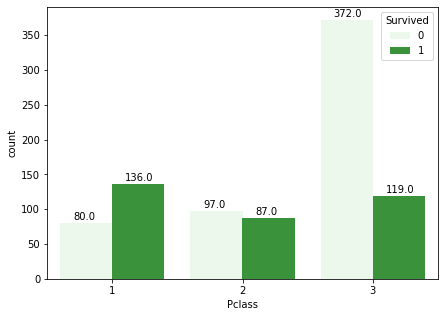

In [15]:
# Checking the survival/death of the people travelling in different class

# Setting the color palette
base_color = sns.color_palette()[2]

# Setting the plot figure size
plt.figure(figsize=(7,5))
ax = sns.countplot(x="Pclass", data=train_df, hue = "Survived", color= base_color)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5)) 


In [16]:
# So the 24% of the passangers travelling in Pclass 3, 47% passangers travelling in Pclass 2, 
# and 63% passangers travelling in Pclass 1 survived. 
# This clearly indicates that the Passanger Class has direct impact on the survival/death    

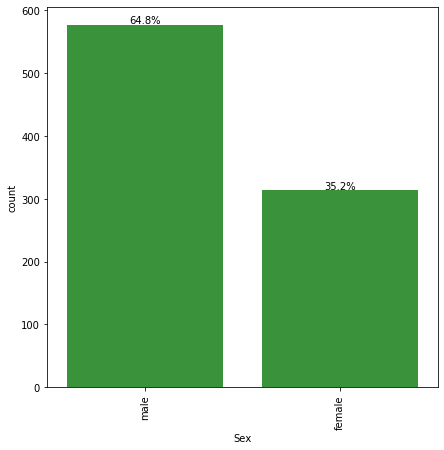

In [17]:
# Checking for the distribution of the Sex 

Gender_counts = train_df["Sex"].value_counts()
Gender_counts

# Getting the order of the gender counts 
Gender_order = Gender_counts.index
Gender_order

# Getting the total count of the gender 

n_gender = train_df["Sex"].value_counts().sum()

# Setting the plot figure size
plt.figure(figsize=(7,7))
sns.countplot(data=train_df, x="Sex", color=base_color, order=Gender_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = Gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_gender)

    # printing the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


Text(0.5, 1.0, 'Survival of People By Gender')

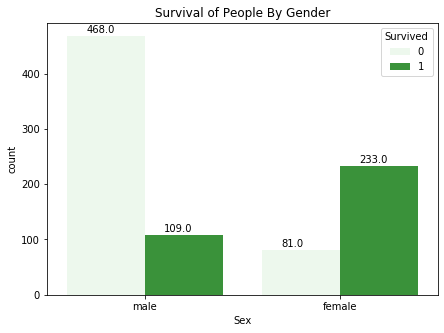

In [18]:
# Now checking the survival or death of the people based on Gender 

# Setting the plot figure size
plt.figure(figsize=(7,5))

ax= sns.countplot(data=train_df, x="Sex", hue= "Survived", color = base_color)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
    
ax.set_title("Survival of People By Gender")

In [19]:
# Looking at the above Bar chart we can infer that:
# 74% of Female survived and on the other hand 19% of male survived and this establish the impact 
# of gender directly on survival and death


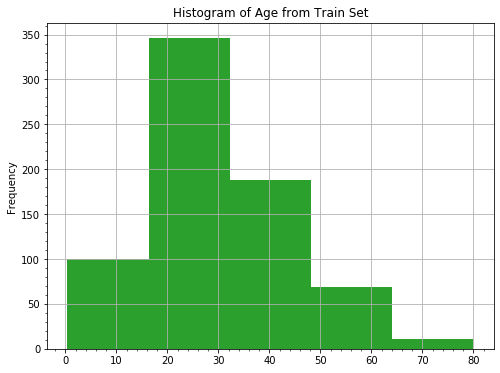

In [20]:
# Checking for the The distribution of the Age as below:

fig, ax = plt.subplots()

train_df["Age"].plot(kind= "hist", bins= 5, figsize = (8,6), color= base_color);

ax.set_title("Histogram of Age from Train Set")
ax.grid()


# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()



# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.3', color='black')


In [21]:
# So the major population onboard is in their 20's. Now we still need to fill up the remaining values of "Age". 
# Now logically the parameters like "Mr/Mrs/Miss.." and "travelling with family/alone" should help us to identify the ages. 
# As Pclass is directly correlated with our target variable "Survived" I would like to analyse whether Pclass has any affects on "Age or not

Prefix Mr- Mean: 32.37, Median: 30.0, Std: 12.71
Prefix Mrs- Mean: 35.9, Median: 35.0, Std: 11.43
Prefix Miss- Mean: 21.77, Median: 21.0, Std: 12.99
Prefix Master- Mean: 4.57, Median: 3.5, Std: 3.62
Prefix Other- Mean: 42.38, Median: 44.5, Std: 13.2


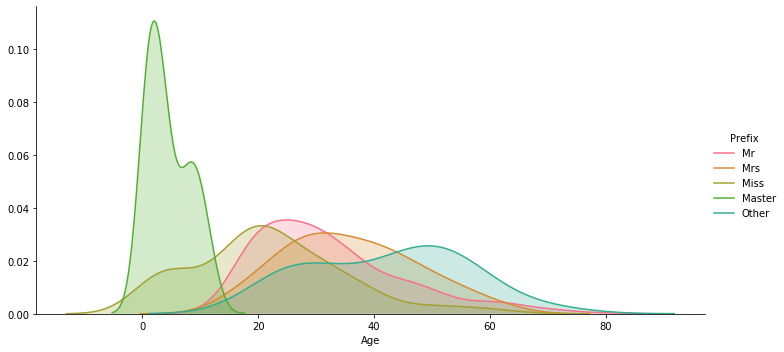

In [22]:
# Checking how prefixes impacts the age

prefixes = ["Mr", "Mrs", "Miss", "Master", "Other"]

for x in prefixes:
    print("Prefix {}- Mean: {}, Median: {}, Std: {}".format(x,
                                                        round(train_df[train_df["Prefix"] == x]["Age"].mean(),2),
                                                        round(train_df[train_df["Prefix"] == x]["Age"].median(),2),
                                                        round(train_df[train_df["Prefix"] == x]["Age"].std(),2)))

#customised_pallete = sns.color_palette("husl", 9)    

sns.set_palette(sns.color_palette("husl", 9))

# Plotting Kernel Density Estimate plot to check the relationshio between Prefix and Age

prefix_plot = sns.FacetGrid(train_df, hue = "Prefix", aspect=2, height =5)

# We can change the colour of the pallete as well for FacetGrid.
#prefix_plot = sns.FacetGrid(train_df, hue = "Prefix", aspect=2, height =5, palette = customised_pallete)
prefix_plot.map(sns.kdeplot, "Age", shade = True)
prefix_plot.add_legend();

In [23]:
# From the above distribution we can see how different "title" affect the "Age" directly. We can clearly see that kids have been provided with "Master" title. 
# So while filling up the null values of Age, this findings will be pretty helpful

Family 0- Mean: 32.22, Median: 29.5, Std: 12.9
Family 1- Mean: 26.41, Median: 26.0, Std: 15.83


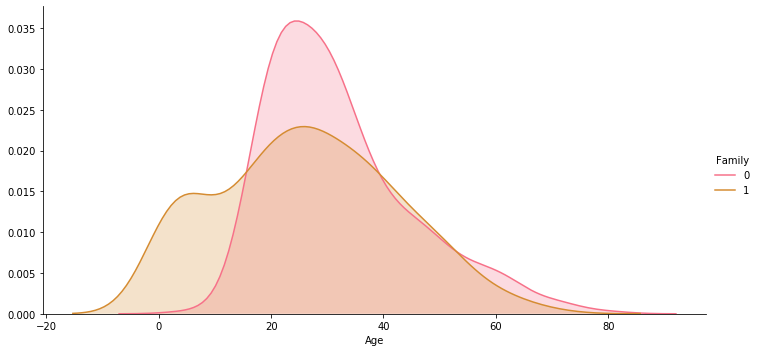

In [24]:
family = [0, 1]

for x in family:
    print("Family {}- Mean: {}, Median: {}, Std: {}".format(x,
                                                        round(train_df[train_df["Family"] == x]["Age"].mean(),2),
                                                        round(train_df[train_df["Family"] == x]["Age"].median(),2),
                                                        round(train_df[train_df["Family"] == x]["Age"].std(),2)))


# setting up the color palette 

sns.set_palette(sns.color_palette("husl", 9))

# Plotting Kernel Density Estimate plot to check the relationshio between Family and Age
    
Family_plot = sns.FacetGrid(train_df, hue = "Family", aspect=2, height =5)
Family_plot.map(sns.kdeplot, "Age", shade = True)
Family_plot.add_legend();

In [25]:
# We can deduce that there is not much difference between mean and median of Age and Family. 
# So this will not make any contribution when we will try to combine these two parameters.

Gender male- Mean: 30.73, Median: 29.0, Std: 14.68
Gender female- Mean: 27.92, Median: 27.0, Std: 14.11


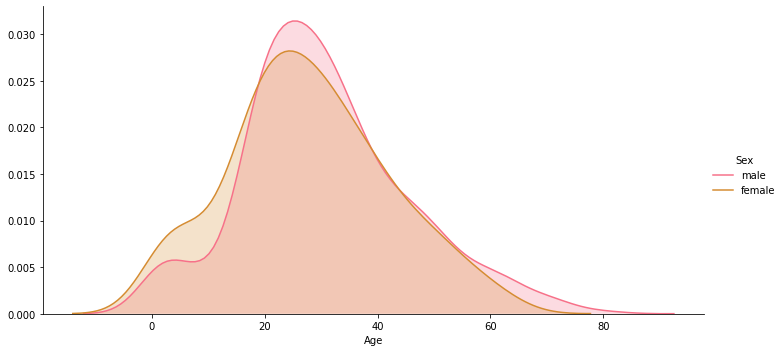

In [26]:
gender = ["male", "female"]

for x in gender:
    print("Gender {}- Mean: {}, Median: {}, Std: {}".format(x,
                                                        round(train_df[train_df["Sex"] == x]["Age"].mean(),2),
                                                        round(train_df[train_df["Sex"] == x]["Age"].median(),2),
                                                        round(train_df[train_df["Sex"] == x]["Age"].std(),2)))



# setting up the color palette 

sns.set_palette(sns.color_palette("husl", 9))

# Plotting Kernel Density Estimate plot to check the relationshio between Sex and Age

Pclass_plot = sns.FacetGrid(train_df, hue = "Sex", aspect=2, height =5)
Pclass_plot.map(sns.kdeplot, "Age", shade = True)
Pclass_plot.add_legend();


# So there is no significant difference in the Age between male and female as we can deduce for the descriptive statistics. 
# Therefore, the gender will not be helpful in evaluating the age.

Pclass 1- Mean: 38.23, Median: 37.0, Std: 14.8
Pclass 2- Mean: 29.88, Median: 29.0, Std: 14.0
Pclass 3- Mean: 25.14, Median: 24.0, Std: 12.5


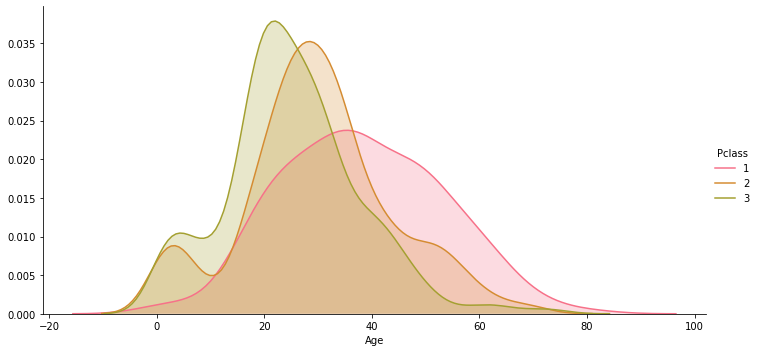

In [27]:
pclass = [1,2,3]

for c in pclass:
    print("Pclass {}- Mean: {}, Median: {}, Std: {}".format(c,
                                                        round(train_df[train_df["Pclass"] == c]["Age"].mean(),2),
                                                        round(train_df[train_df["Pclass"] == c]["Age"].median(),2),
                                                        round(train_df[train_df["Pclass"] == c]["Age"].std(),2)))



# setting up the color palette 

sns.set_palette(sns.color_palette("husl", 9))

# Plotting Kernel Density Estimate plot to check the relationshio between Pclass and Age

Pclass_plot = sns.FacetGrid(train_df, hue = "Pclass", aspect=2, height =5)
Pclass_plot.map(sns.kdeplot, "Age", shade = True)
Pclass_plot.add_legend();


# There is a vast difference between Age of individuals travelling in class 3 and 1. 
# Therefore, Pclass will be helpful in evaluating the age.

In [28]:
# Now combining Pclass, Prefix, and Family parameter to fill the null values of ages.

age_df = pd.DataFrame(round(train_df.groupby(["Pclass", "Prefix", "Family"])["Age"].median(), 2))

age_df.reset_index(inplace = True)
age_df.head(3)



,Pclass,Prefix,Family,Age
0,1,Master,1,4.0
1,1,Miss,0,31.0
2,1,Miss,1,22.0


In [29]:
#Function that will compare the conditions of age_df with train_df for the imputation of the null values

def impute_age(row):
    condition = (
        (age_df['Pclass'] == row['Pclass']) & 
        (age_df['Prefix'] == row['Prefix']) & 
        (age_df['Family'] == row['Family'])
    ) 
    return age_df[condition]['Age'].values[0]

# Function that will process the imputation for the null values if the conditions match for both the dataframes 
# It will check whether Age have null values

def process_age():
    global train_df # declaring it global so that it can be modified inside function
    # a function that fills the missing values of the Age column
    train_df['Age'] = train_df.apply(lambda row: impute_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return train_df

train_df = process_age()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
Prefix         891 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [30]:
# In executing the process_age function we can see that the null values of "Age" are being imputed 

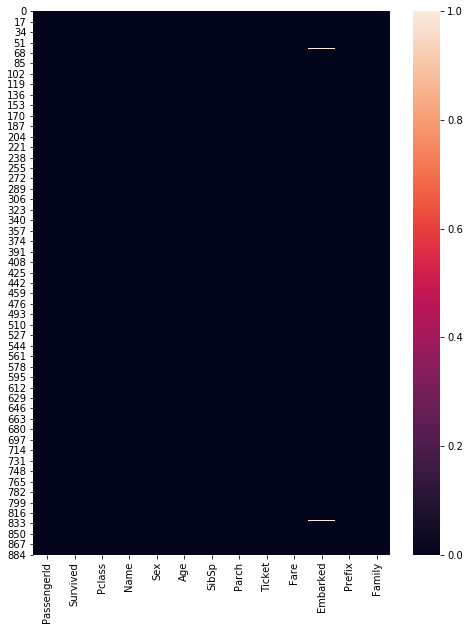

In [31]:
#Identify the missing values using Heatmap

plt.figure(figsize=(8,10))
sns.heatmap(train_df.isnull());

In [32]:
# for the above heatmap we can see that there are two misisng values for Embarked 

In [33]:
# to get the indexes where Embark values are missing

missing_data = train_df[train_df.isnull().any(axis=1)]
print(missing_data)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked Prefix  Family  
61   female  38.0      0      0  113572  80.0      NaN   Miss       0  
829  female  62.0      0      0  113572  80.0      NaN    Mrs       0  


In [34]:
# From the above missing_dataframe we get the indexes as 61 & 829 for the Embarked 
train_df.iloc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs,0


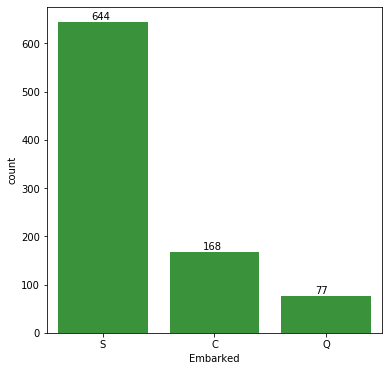

In [35]:
# Checking for the distribution of the Embarked column 



plt.figure(figsize=(6,6))
ax= sns.countplot(data=train_df, x="Embarked", color = base_color)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

In [36]:
# For the above bar chart we can observe that 72% of the population embarked from Southampton. 
# I need to check if I can use "Fare" and "Pclass" to see if we can get the information from there or not.

In [37]:
# Trying to use Pclass "1" as when for indexes 61 & 829 where Embarked values are missing have Pclass as "1"
# and will also see for which embarkment the value for "Fare" is closed to 80

embark = ["S", "C", "Q"]
cond1 = train_df["Pclass"] == 1 

for x in embark:
    cond2 = train_df["Embarked"] == x
    train_df[cond1 & cond2]
    print("Embarkment {}  and Pclass 1: Mean: {}, Median: {}, std: {}".format(x,
                                                                round(train_df[cond1 & cond2]["Fare"].mean(),2),
                                                                round(train_df[cond1 & cond2]["Fare"].median(),2),
                                                                round(train_df[cond1 & cond2]["Fare"].std(),2)))

Embarkment S  and Pclass 1: Mean: 70.36, Median: 52.0, std: 58.81
Embarkment C  and Pclass 1: Mean: 104.72, Median: 78.27, std: 99.09
Embarkment Q  and Pclass 1: Mean: 90.0, Median: 90.0, std: 0.0


In [38]:
# Looking at the output we can see that "Q" looks to be promising with closer fare price to 80 with no standard deviation.
# This needs further investigation.

train_df[train_df["Embarked"]=="Q"]["Pclass"].value_counts()

3    72
2     3
1     2
Name: Pclass, dtype: int64

In [39]:
# We can see that there are only two people who embarked from Queenstown, so the data is not large enough to predict much.
# Therefore we should replace the null values of Embarked with "S" as it has the second lowest standard deviaton in it's values,
# as well as more data points, and close value to 80 as also.

train_df.iloc[[61,829], 10] = "S"

# Checking for the train DataFrame info again 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Prefix         891 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [40]:
# Now there is no missing values exist in the dataframe anymore

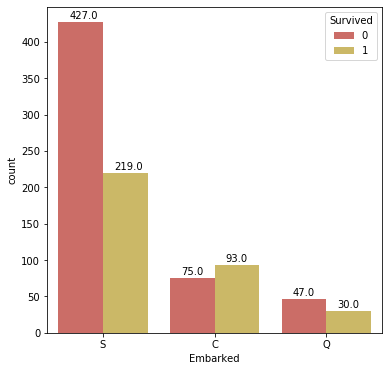

In [41]:
# Now exploring the survival by Embarkment 
plt.figure(figsize=(6,6))
base_color = sns.set_palette(sns.color_palette("hls", 8))
ax = sns.countplot(data=train_df, x="Embarked", hue= "Survived", color = base_color)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 5))  


In [42]:
# Looking at the above bar chart above we can make it out that 66% of the people who embarked from "S" did not survived.

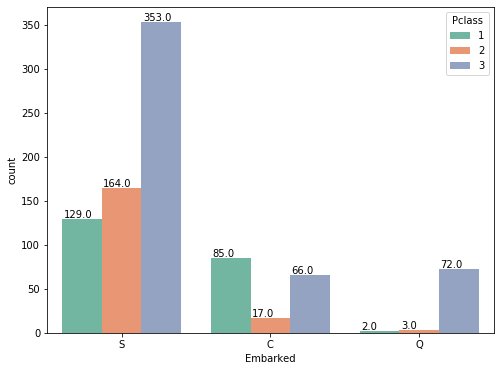

In [43]:
# Now exploring the Pclass among the embarked

base_color = sns.set_palette(sns.color_palette("Set2"))
plt.figure(figsize=(8,6))
ax=  sns.countplot(data=train_df, x= "Embarked", hue= "Pclass", color= base_color)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+2))

In [44]:
# We can infer from the above bar chart the points mentioned as below:

# Passengers who are travelling in Class 3 have embarked from all the stations
# People who embarked from Cherbourg traveled in class 1 and 3
# Very few people embarked from Queenstown in class 1 and 2
# Ultimately, there is no specific trend to predict in this data

<Figure size 576x432 with 0 Axes>

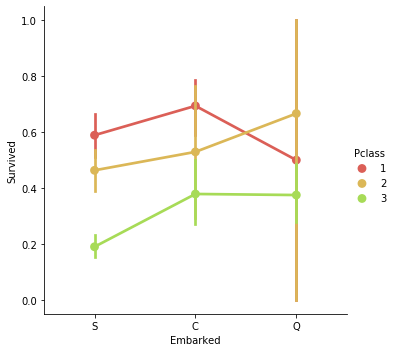

In [45]:
# also checking with another plot if there is any inference we can makeout from Pclass and Embarked

plt.figure(figsize= (8,6))
base_color = sns.set_palette(sns.color_palette("hls", 9))
sns.catplot(x= "Embarked", y= "Survived", data= train_df, color= base_color, hue="Pclass", kind= "point");

In [46]:
# the above catplot did not provided any good data insights so we can drop "Embark" parameter

Pclass 1- Mean: 84.15, Median: 60.29, Std: 78.38
Pclass 2- Mean: 20.66, Median: 14.25, Std: 13.42
Pclass 3- Mean: 13.68, Median: 8.05, Std: 11.78


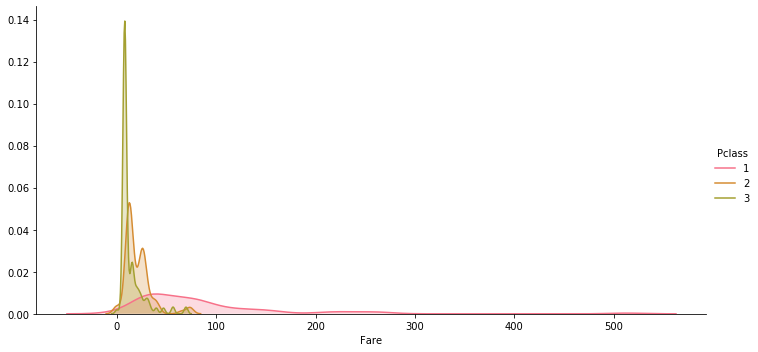

In [47]:
# Exploring the Fare parameter as below

# Checking for the Descriptive Statistics of the Fare parameters associated with each Pclass

Pclass = [1,2,3]

for c in Pclass:
    print("Pclass {}- Mean: {}, Median: {}, Std: {}".format(c,
                                                        round(train_df[train_df["Pclass"] == c]["Fare"].mean(),2),
                                                        round(train_df[train_df["Pclass"] == c]["Fare"].median(),2),
                                                        round(train_df[train_df["Pclass"] == c]["Fare"].std(),2)))

# setting up the color palette 

sns.set_palette(sns.color_palette("husl", 9))

# Plotting Kernel Density Estimate plot to check the relationshio between Pclass and Fare
# Pclass and Survived have significant relationship so checking if fare have something to do with the survival indirectly.

figure = sns.FacetGrid(train_df, hue = "Pclass", aspect=2, height= 5)
figure.map(sns.kdeplot, "Fare", shade = True)
figure.add_legend();


In [48]:
# From Kernel Density Estimate plot we can deduce that fare is directly propotional to Pclass which is significantly 
# related to survival/death of the passenger

Survived 0- Mean: 22.12, Median: 10.5, Std: 31.39
Survived 1- Mean: 48.4, Median: 26.0, Std: 66.6


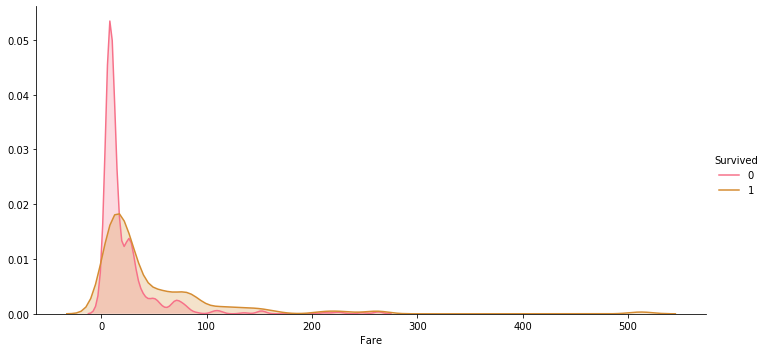

In [49]:
# Now checking for the relationship between Fare and the Survived
# Checking for the Descriptive Statistics of the Fare parameters associated with Survived 

Survival = [0,1]

for s in Survival:
        print("Survived {}- Mean: {}, Median: {}, Std: {}".format(s,
                                                        round(train_df[train_df["Survived"] == s]["Fare"].mean(),2),
                                                        round(train_df[train_df["Survived"] == s]["Fare"].median(),2),
                                                        round(train_df[train_df["Survived"] == s]["Fare"].std(),2)))

# setting up the color palette 

sns.set_palette(sns.color_palette("husl", 9))

# Plotting Kernel Density Estimate plot to check the relationshio between Survived and Fare

figure = sns.FacetGrid(train_df, hue = "Survived", aspect=2, height= 5)
figure.map(sns.kdeplot, "Fare", shade = True)
figure.add_legend();

In [50]:
# from the descriptive statistics and the Kernel Density Estimate plot we can deduce that 
# Fare is directly proportional to Survival and death of the passenger. 

In [51]:
# As we have seen that as the Fare is increased the death rate is decreased 
# So we should create another Categorical column for fare bins 
# In order to create the bins we can use the median values of "Fare" for the different Pclass 

Pclass = [1,2,3]

for p in Pclass:
    print("Pclass {}- Median {}".format(p, 
                                        round(train_df[train_df["Pclass"] == p]["Fare"].median(),2)))

Pclass 1- Median 60.29
Pclass 2- Median 14.25
Pclass 3- Median 8.05


In [52]:
# For creating the bins lets define the function using the median values as above 
# we can use this function for test population as well

def fare_bin(fare):
    if fare <= 8.05:
        return "Bin1"
    elif fare > 8.05 and fare <= 14.05:
        return "Bin2"
    elif fare > 14.05 and fare <= 60.29:
        return "Bin3"
    else:
        return "Bin4"    

In [53]:
# Now using the Fare_bin function to create Fare_bins categorical column

train_df["Fare_Bin"] = train_df["Fare"].apply(fare_bin)
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,Bin1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,Bin4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,Bin1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,Bin3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,Bin1


In [54]:
# Checking for the Random Ticket Numbers for the influence on Survived as below

# Getting the ticket Number from the train dataframe

train_df.head(10)
train_df.tail(10)

# Considering Ticket Number which is "349909" 

train_df[train_df["Ticket"] == "349909"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,Fare_Bin
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S,Master,1,Bin3
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,S,Miss,1,Bin3
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,S,Miss,1,Bin3
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S,Mrs,1,Bin3


In [55]:
# From the data we can say that all these people were travelling together and none of them survived

In [56]:
# Considering Ticket Number which is "347077" 

train_df[train_df["Ticket"] == "347077"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,Fare_Bin
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S,Mrs,1,Bin3
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,S,Master,1,Bin3
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,S,Miss,1,Bin3
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,S,Master,1,Bin3


In [57]:
# from the data we can say that all these people were travelling together and one of them did not survived
# After checking for the ticket numbers I found that there is no direct relationship with Survival or death of the passenger.

Gender male- : Mean: 16.71, Median: 8.05, std: 31.96
Gender female- : Mean: 36.02, Median: 10.5, std: 63.29


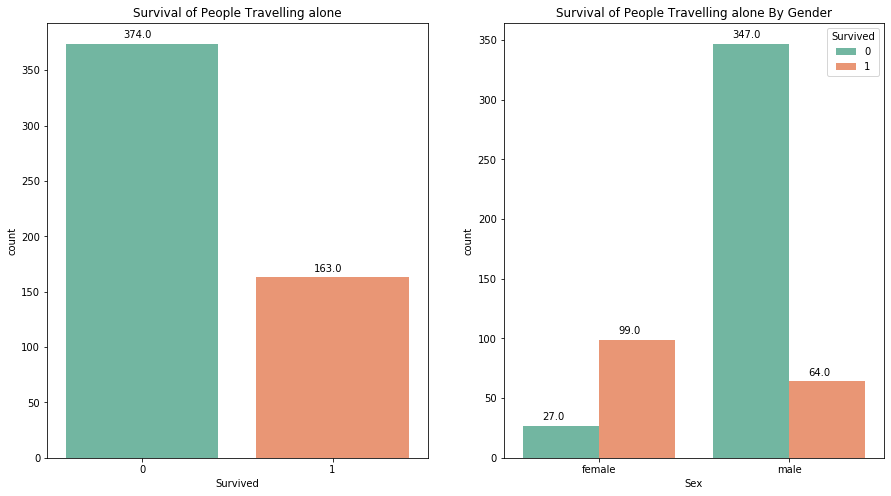

In [58]:
# Evaluating SibSp, Parch, Family together for the feature Engineering

# For the people travelling alone

Gender = ["male","female"]

cond1 = train_df["Family"] == 0 

for g in Gender:
    cond2 = train_df["Sex"] == g
    train_df[cond1 & cond2]
    print("Gender {}- : Mean: {}, Median: {}, std: {}".format(g,
                                                                round(train_df[cond1 & cond2]["Fare"].mean(),2),
                                                                round(train_df[cond1 & cond2]["Fare"].median(),2),
                                                                round(train_df[cond1 & cond2]["Fare"].std(),2)))

base_color = sns.set_palette(sns.color_palette("Set2"))


fig, ax = plt.subplots(1,2, figsize = (15,8))

sns.countplot(train_df[train_df["Family"] == 0]["Survived"], ax = ax[0], color= base_color)
sns.countplot(train_df[train_df["Family"] == 0]["Sex"], 
              hue=train_df[train_df["Family"] == 0]["Survived"], 
              ax = ax[1], color= base_color)

ax[0].set_title("Survival of People Travelling alone")
ax[1].set_title("Survival of People Travelling alone By Gender")


for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

In [59]:

# Out of total male population travelling alone, 84.4% males died
# Out of total female population travelling alone, 78.5% females survived
# 70% people died when travelling alone

Gender male- : Mean: 47.34, Median: 27.9, std: 57.32
Gender female- : Mean: 50.15, Median: 26.27, std: 53.59


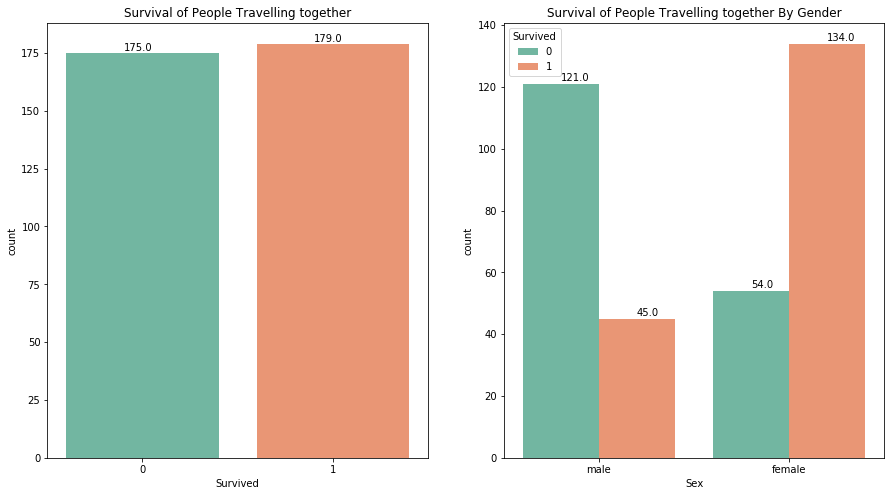

In [60]:
# Evaluating SibSp, Parch, Family together for the feature Engineering

# For the people travelling not alone

Gender = ["male","female"]

cond1 = train_df["Family"] == 1 

for g in Gender:
    cond2 = train_df["Sex"] == g
    train_df[cond1 & cond2]
    print("Gender {}- : Mean: {}, Median: {}, std: {}".format(g,
                                                                round(train_df[cond1 & cond2]["Fare"].mean(),2),
                                                                round(train_df[cond1 & cond2]["Fare"].median(),2),
                                                                round(train_df[cond1 & cond2]["Fare"].std(),2)))

#base_color = sns.set_palette(sns.color_palette("husl", 9))
base_color = sns.set_palette(sns.color_palette("Set2"))

fig, ax = plt.subplots(1,2, figsize = (15,8))

sns.countplot(train_df[train_df["Family"] == 1]["Survived"], ax = ax[0], color= base_color)
sns.countplot(train_df[train_df["Family"] == 1]["Sex"], 
              hue=train_df[train_df["Family"] == 1]["Survived"], 
              ax = ax[1], color= base_color)

ax[0].set_title("Survival of People Travelling together")
ax[1].set_title("Survival of People Travelling together By Gender")
ax[1].legend(title='Survived', loc='upper left')

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

In [61]:
# 71.2% of the females survived while travelling with someone and 72.8% of the male died while travelling with someone
# 50%-50% chance of death/survival when travelling with someone


# We can conclude from above plots that travelling alone was was beneficial for the women  whereas it was harmful for Males.
# Travelling with someone (which could be family) increased survival chances of Females where reduced the survival of Males. 
# Therefore, it is required to analyse the family size and its effect on survival/death of a person. 
# Overall, in any case Females seem to have higher chances of survival than Males.

In [62]:
# Now we need to create another categorical column for Family size  using the function total_num_of_people

# Applying the function to get to the total number of people in the family

train_df["Family_Size"] = train_df[["SibSp","Parch"]].apply(total_num_of_people, axis = 1)

# Creating the Family size bins based on the Family size as below:
# Travelling alone - 1
# Small family - 2
# Large family - 3


def family_bin(fam_size):
    if fam_size == 0:
        return "1"
    elif fam_size <= 5:
        return "2"
    else:
        return "3"
    
# apply the Family_bin function now
train_df["Family_Bin"]= train_df["Family_Size"].apply(family_bin)

# Checking the DataFrame
train_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,Fare_Bin,Family_Size,Family_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,Bin1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,Bin4,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,Bin1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,Bin3,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,Bin1,0,1


In [63]:
# Another categorical column can be created on the basis of Age whiich can be named as "Age_group"

# Defining function for creating the "Age_Group" based on different age

def age_group(age):
    if age <= 15:
        return "Child"
    elif age > 15 and age <= 30:
        return "Adult"
    elif age > 30 and age <= 45:
        return "Senior"
    elif age > 45 and age <= 60:
        return "Super_Senior"
    else:
        return "Old"

# apply the age_group function now
train_df["Age_Group"] = train_df["Age"].apply(age_group)

# Checking the DataFrame
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,Fare_Bin,Family_Size,Family_Bin,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,Bin1,1,2,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,Bin4,1,2,Senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,Bin1,0,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,Bin3,1,2,Senior
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,Bin1,0,1,Senior


In [64]:
# Creating the copy of the train DataFrame as below so that we retain the original and added columns:

train_copy_df = train_df.copy()
train_copy_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,Fare_Bin,Family_Size,Family_Bin,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,Bin1,1,2,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,Bin4,1,2,Senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,Bin1,0,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,Bin3,1,2,Senior
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,Bin1,0,1,Senior


In [65]:
# Now dropping the columns which are not being considered as important or not needed variables from the training DataFrame

train_df.drop(["Name", "Ticket", "Embarked","Family","Family_Size","SibSp","Parch"], axis= 1, inplace = True)
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Prefix,Fare_Bin,Family_Bin,Age_Group
0,1,0,3,male,22.0,7.2500,Mr,Bin1,2,Adult
1,2,1,1,female,38.0,71.2833,Mrs,Bin4,2,Senior
2,3,1,3,female,26.0,7.9250,Miss,Bin1,1,Adult
3,4,1,1,female,35.0,53.1000,Mrs,Bin3,2,Senior
4,5,0,3,male,35.0,8.0500,Mr,Bin1,1,Senior


In [66]:
# Now converting categorical data into dummy or indicator variables and storing it in another DataFrame
# this is called on-Hot encoding:

dummies = pd.get_dummies(train_df[["PassengerId", "Sex", "Prefix","Fare_Bin","Family_Bin","Age_Group"]])

# Checking the DataFrame
dummies.head(5)

,PassengerId,Sex_female,Sex_male,Prefix_Master,Prefix_Miss,Prefix_Mr,Prefix_Mrs,Prefix_Other,Fare_Bin_Bin1,Fare_Bin_Bin2,Fare_Bin_Bin3,Fare_Bin_Bin4,Family_Bin_1,Family_Bin_2,Family_Bin_3,Age_Group_Adult,Age_Group_Child,Age_Group_Old,Age_Group_Senior,Age_Group_Super_Senior
0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,2,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,3,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,4,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,5,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [67]:
# Now Merging the dummies DataFrame to Training DataFrame

train_df = pd.merge(train_df, dummies, on ="PassengerId")

# Checking the DataFrame
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Prefix,Fare_Bin,Family_Bin,Age_Group,...,Fare_Bin_Bin3,Fare_Bin_Bin4,Family_Bin_1,Family_Bin_2,Family_Bin_3,Age_Group_Adult,Age_Group_Child,Age_Group_Old,Age_Group_Senior,Age_Group_Super_Senior
0,1,0,3,male,22.0,7.2500,Mr,Bin1,2,Adult,...,0,0,0,1,0,1,0,0,0,0
1,2,1,1,female,38.0,71.2833,Mrs,Bin4,2,Senior,...,0,1,0,1,0,0,0,0,1,0
2,3,1,3,female,26.0,7.9250,Miss,Bin1,1,Adult,...,0,0,1,0,0,1,0,0,0,0
3,4,1,1,female,35.0,53.1000,Mrs,Bin3,2,Senior,...,1,0,0,1,0,0,0,0,1,0
4,5,0,3,male,35.0,8.0500,Mr,Bin1,1,Senior,...,0,0,1,0,0,0,0,0,1,0


In [68]:
# Now checking the columns of the final training DataFrame

train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Prefix',
       'Fare_Bin', 'Family_Bin', 'Age_Group', 'Sex_female', 'Sex_male',
       'Prefix_Master', 'Prefix_Miss', 'Prefix_Mr', 'Prefix_Mrs',
       'Prefix_Other', 'Fare_Bin_Bin1', 'Fare_Bin_Bin2', 'Fare_Bin_Bin3',
       'Fare_Bin_Bin4', 'Family_Bin_1', 'Family_Bin_2', 'Family_Bin_3',
       'Age_Group_Adult', 'Age_Group_Child', 'Age_Group_Old',
       'Age_Group_Senior', 'Age_Group_Super_Senior'],
      dtype='object')

In [69]:
# Now working on the Test file 

# Importing Test CSV file and creating the test Dataframe

test_df = pd.read_csv('test.csv')

# Checking the DataFrame
test_df.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
# Some general info of the test DataFrame

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [71]:
# Now we need to check how many are travelling alone and how many are travelling with somebody in test DataFrame

# Applying the function to get to the total number of people in the family in test DataFrame

test_df["Family"] = test_df[["SibSp","Parch"]].apply(total_num_of_people, axis = 1)

# if the number is returned as 0 then set alone status as "0" in Family otherwise mark it as "1"

test_df["Family"].loc[test_df["Family"] > 0] = 1
test_df["Family"].loc[test_df["Family"] == 0] = 0

# Checking the DataFrame
test_df.head(5)

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [72]:
# Creating a new column "Prefix" which will have all the values like "Mr", "Mrs", "Miss", "Master", etc.
# using name_prefix function

test_df["Prefix"] = test_df["Name"].apply(name_prefix)

test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Prefix
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1,Mr


In [73]:
# Creating a new column "Prefix" which will have "Mr", "Miss", "Mrs" & "Master" and the rest of them we can club
# them in "Other" category

# Applying simple for loop which will do it 

for i in range(len(test_df)):
    if test_df["Prefix"][i] not in ["Mr", "Miss", "Mrs", "Master"]:
        test_df["Prefix"][i] = "Other"
        
# Checking for the imputation done.
        
test_df["Prefix"].value_counts()

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Prefix, dtype: int64

In [74]:
# While computing the "Age" parameter I figured out that the way I have computed the ages in the train dataset
# doesn't exactly go for test DataFrame as well. There are couple of rows which have different values than 
# that we saw in the train DataFrame so I have to put the ages manually there.
# the index values which needs to be treated differntly are 4, 88 & 339.


# Checking the values for the index 88

test_df.iloc[88]

PassengerId                        980
Pclass                               3
Name           O'Donoghue, Ms. Bridget
Sex                             female
Age                                NaN
SibSp                                0
Parch                                0
Ticket                          364856
Fare                              7.75
Cabin                              NaN
Embarked                             Q
Family                               0
Prefix                           Other
Name: 88, dtype: object

In [75]:
# I would use the median value of all the "Other" of the training copy DataFrame

print(train_copy_df[train_copy_df["Prefix"] == "Other"]["Age"].median())

44.0


In [76]:
# So Using the median value obtained above impute it for index 88 of test DataFrame

test_df.iloc[88,4] = 44

In [77]:
# Similarly checking for index 339 of test DataFrame

test_df.iloc[339]

PassengerId                     1231
Pclass                             3
Name           Betros, Master. Seman
Sex                             male
Age                              NaN
SibSp                              0
Parch                              0
Ticket                          2622
Fare                          7.2292
Cabin                            NaN
Embarked                           C
Family                             0
Prefix                        Master
Name: 339, dtype: object

In [78]:
# I would use the median value of all the "Master" of the training copy DataFrame

print(train_copy_df[train_copy_df["Prefix"] == "Master"]["Age"].median())

4.0


In [79]:
# So Using the median value obtained above impute it for index 88 of test DataFrame

test_df.iloc[339,4] = 4

In [80]:
# As there is less data in test dataset so I will use training DataFrame to impute the missing Age values

#Function that will compare the conditions of age_df with train_df for the imputation of the null values

def fill_age(row):
    condition = (
        (age_df['Pclass'] == row['Pclass']) & 
        (age_df['Prefix'] == row['Prefix']) & 
        (age_df['Family'] == row['Family'])
    ) 
    return age_df[condition]['Age'].values[0]


# Function that will process the imputation for the null values if the conditions match for both the dataframes 
# It will check whether Age have null values

def imputate_age():
    global test_df # declaring it global so that it can be modified inside function
    # a function that fills the missing values of the Age column
    test_df['Age'] = test_df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return test_df

test_df = imputate_age()

# Checking the test DataFrame Summary
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Family         418 non-null int64
Prefix         418 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


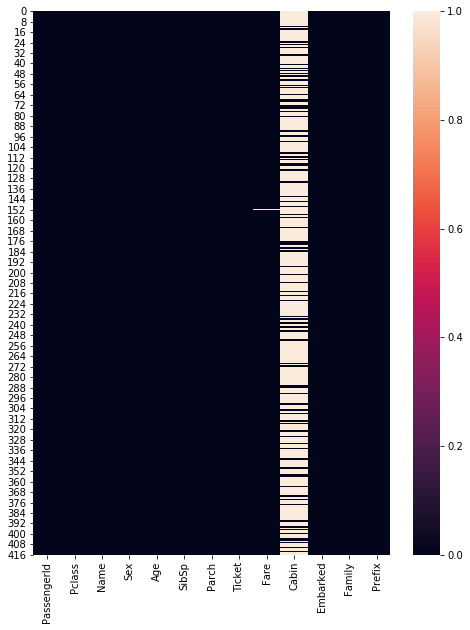

In [81]:
#Identify the missing values using Heatmap for test DataFrame

plt.figure(figsize=(8,10))
sns.heatmap(test_df.isnull());

In [82]:
#Using the heatmap we figured out about the Missing Fare location at index 152 

test_df.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Family                          0
Prefix                         Mr
Name: 152, dtype: object

In [83]:
# Simply use same Pclass to fill the value of Fare in test DataFrame from Training DataFrame and 
# using median value for imputation

train_copy_df[train_copy_df["Pclass"] == 3]["Fare"].median()

8.05

In [84]:
# So Using the median value obtained above impute it for index 152 of test DataFrame for Fare

test_df.iloc[152,8] = 8.05

In [85]:
# Checking the test DataFrame Summary after imputation

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Family         418 non-null int64
Prefix         418 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


In [86]:
# Creating the Fare_Bin column in test DataFrame using function fare_bin

test_df["Fare_Bin"] = test_df["Fare"].apply(fare_bin)
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Prefix,Fare_Bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,Bin1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,Bin1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,Bin2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr,Bin2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs,Bin2


In [87]:
# Now we need to create another categorical column for Family size  using the function total_num_of_people in test DataFrame

# Applying the function to get to the total number of people in the family

test_df["Family_Size"] = test_df[["SibSp","Parch"]].apply(total_num_of_people, axis = 1)

# Creating the Family size bins based on the Family size as below using family_bin function defined earlier
# Travelling alone - 1
# Small family - 2
# Large family - 3
    
# apply the Family_bin function now
test_df["Family_Bin"]= test_df["Family_Size"].apply(family_bin)

# Checking the test DataFrame
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Prefix,Fare_Bin,Family_Size,Family_Bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,Bin1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,Bin1,1,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,Bin2,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr,Bin2,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs,Bin2,2,2


In [88]:
# Another categorical column "Age_group" using age_group function defined earlier

# apply the age_group function now
test_df["Age_Group"] = test_df["Age"].apply(age_group)

# Checking the DataFrame
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Prefix,Fare_Bin,Family_Size,Family_Bin,Age_Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,Bin1,0,1,Senior
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,Bin1,1,2,Super_Senior
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,Bin2,0,1,Old
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr,Bin2,0,1,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs,Bin2,2,2,Adult


In [89]:
# Now dropping the columns which are not being considered as important or not needed variables from the test DataFrame

test_df.drop(["Name", "Ticket", "Embarked","Family","Family_Size","SibSp","Parch"], axis= 1, inplace = True)
test_df.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Prefix,Fare_Bin,Family_Bin,Age_Group
0,892,3,male,34.5,7.8292,NaN,Mr,Bin1,1,Senior
1,893,3,female,47.0,7.0000,NaN,Mrs,Bin1,2,Super_Senior
2,894,2,male,62.0,9.6875,NaN,Mr,Bin2,1,Old
3,895,3,male,27.0,8.6625,NaN,Mr,Bin2,1,Adult
4,896,3,female,22.0,12.2875,NaN,Mrs,Bin2,2,Adult


In [90]:
# Now converting categorical data into dummy or indicator variables and storing it in another DataFrame for test DataFrame

test_dummies = pd.get_dummies(test_df[["PassengerId", "Sex", "Prefix","Fare_Bin","Family_Bin","Age_Group"]])

# Checking the DataFrame

test_dummies.head(5)

,PassengerId,Sex_female,Sex_male,Prefix_Master,Prefix_Miss,Prefix_Mr,Prefix_Mrs,Prefix_Other,Fare_Bin_Bin1,Fare_Bin_Bin2,Fare_Bin_Bin3,Fare_Bin_Bin4,Family_Bin_1,Family_Bin_2,Family_Bin_3,Age_Group_Adult,Age_Group_Child,Age_Group_Old,Age_Group_Senior,Age_Group_Super_Senior
0,892,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,893,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
2,894,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,895,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,896,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0


In [91]:
# Merging the test DataFrame and test_dummies 

test_df = pd.merge(test_df, test_dummies, on ="PassengerId")
test_df.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Prefix,Fare_Bin,Family_Bin,Age_Group,...,Fare_Bin_Bin3,Fare_Bin_Bin4,Family_Bin_1,Family_Bin_2,Family_Bin_3,Age_Group_Adult,Age_Group_Child,Age_Group_Old,Age_Group_Senior,Age_Group_Super_Senior
0,892,3,male,34.5,7.8292,NaN,Mr,Bin1,1,Senior,...,0,0,1,0,0,0,0,0,1,0
1,893,3,female,47.0,7.0000,NaN,Mrs,Bin1,2,Super_Senior,...,0,0,0,1,0,0,0,0,0,1
2,894,2,male,62.0,9.6875,NaN,Mr,Bin2,1,Old,...,0,0,1,0,0,0,0,1,0,0
3,895,3,male,27.0,8.6625,NaN,Mr,Bin2,1,Adult,...,0,0,1,0,0,1,0,0,0,0
4,896,3,female,22.0,12.2875,NaN,Mrs,Bin2,2,Adult,...,0,0,0,1,0,1,0,0,0,0


In [92]:
# Checking the shape of the final train and test DataFrame

print("Shape of train_df: {}".format(train_df.shape))
print("Shape of test_df: {}".format(test_df.shape))

Shape of train_df: (891, 29)
Shape of test_df: (418, 29)


In [93]:
# From above we can verify that Now Train and Test have equal number of columns

(14.0, 0.0)

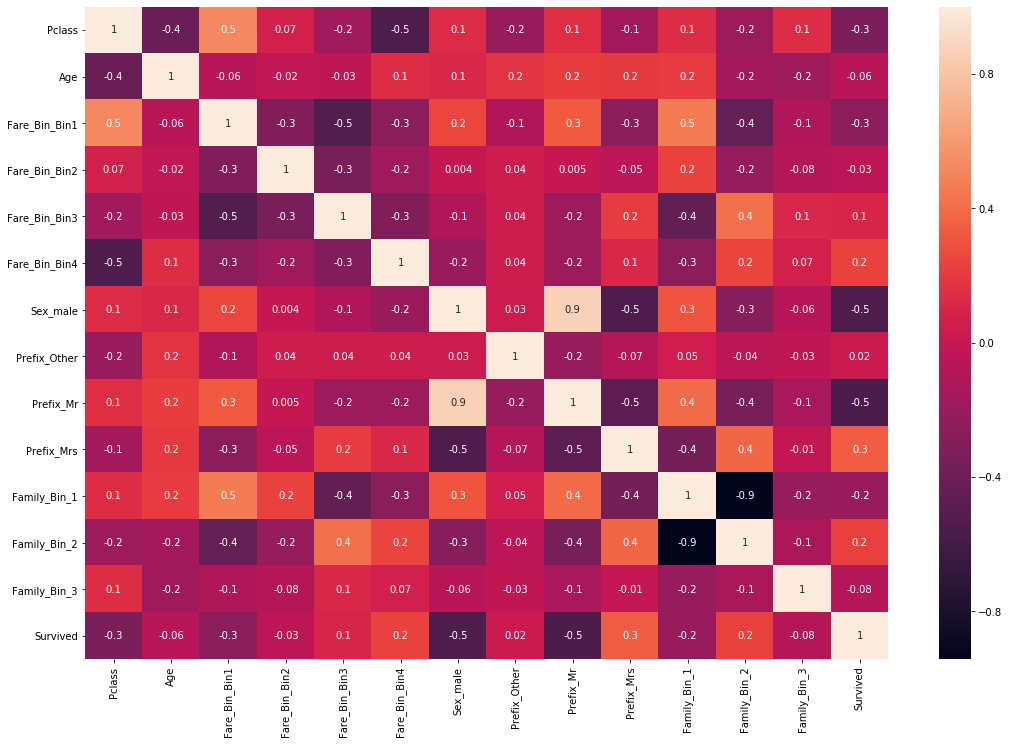

In [94]:
# Also checking the correlation between the various chosen variables and including Survived column as well

selected_df = train_df[["Pclass", "Age", "Fare_Bin_Bin1", "Fare_Bin_Bin2", "Fare_Bin_Bin3", "Fare_Bin_Bin4",
                 "Sex_male", "Prefix_Other", "Prefix_Mr","Prefix_Mrs", "Family_Bin_1", 
                 "Family_Bin_2", "Family_Bin_3", "Survived"]]

# We create a correlation heatmap and adjusting the top and bottom of it

plt.figure(figsize=(18,12))
ax = sns.heatmap(selected_df.corr(), annot=True, fmt='.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [95]:
# Application of Machine Learning Begins From Here

# for random train and test split
from sklearn.model_selection import train_test_split

# for logistic Regression
from sklearn.linear_model import LogisticRegression

# for accuracy of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# for performance tuning
from sklearn.model_selection import GridSearchCV

In [96]:
# Final selection of the variables which I am going to use for training the model

X =  train_df[["Pclass", "Age", "Fare_Bin_Bin1", "Fare_Bin_Bin2", "Fare_Bin_Bin3", "Fare_Bin_Bin4",
                 "Sex_male", "Prefix_Other", "Prefix_Mr","Prefix_Mrs", "Family_Bin_1", 
                 "Family_Bin_2", "Family_Bin_3"]]
                 
y = train_df["Survived"]



In [97]:
# Now dividing the training DataFrame further into train and test

# We make training and test sets to make sure that after we train our classification algorithm, 
# it is able to generalize well to new data.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

# Make an instance of the Model

logreg1 = LogisticRegression(solver="liblinear")


# Model is learning the relationship between (X_train) and (y_train)

logreg1.fit(X_train, y_train)


# Making predictions on entire X_test data

logreg1_pred = logreg1.predict(X_test)

# Making predictions on entire X_test data

print(classification_report(y_test, logreg1_pred))


print(confusion_matrix(y_test, logreg1_pred))


# getting the Accuracy Score to measure the performance of the model

print("Accuracy score: {}".format((accuracy_score(y_test, logreg1_pred)*100)))


# getting the f1-Score to measure the performance of the model

print("f1-score: {}".format((f1_score(y_test, logreg1_pred)*100)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       175
           1       0.79      0.74      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

[[151  24]
 [ 31  89]]
Accuracy score: 81.35593220338984
f1-score: 76.39484978540773


In [98]:
# Using Grid search for performing hyper parameter tuning in order to get the best accuracy levels

param_grid = {"penalty": ["l2"],
              "C": [0.001, 0.01, 0.1, 1.0, 10, 100],
              "solver": ["liblinear", "newton-cg", "sag", "lbfgs", "saga"]}
grid_model = GridSearchCV(LogisticRegression(), param_grid, cv = 5, verbose =3)
grid_model.fit(X_train, y_train)
pred = grid_model.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.630, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.630, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.627, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l2, solver=newton-cg, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\

[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.630, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.630, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.627, total=   0.0s
[CV] C=0.001, penalty=l2, solver=saga ................................
[CV] .... C=0.001, penalty=l2, solver=saga, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=saga ................................
[CV] .... C=0.001, penalty=l2, solver=saga, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=saga ................................
[CV] .

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\an

[CV]  C=0.01, penalty=l2, solver=newton-cg, score=0.689, total=   0.0s
[CV] C=0.01, penalty=l2, solver=newton-cg ............................
[CV]  C=0.01, penalty=l2, solver=newton-cg, score=0.748, total=   0.0s
[CV] C=0.01, penalty=l2, solver=newton-cg ............................
[CV]  C=0.01, penalty=l2, solver=newton-cg, score=0.780, total=   0.0s
[CV] C=0.01, penalty=l2, solver=sag ..................................
[CV] ...... C=0.01, penalty=l2, solver=sag, score=0.758, total=   0.0s
[CV] C=0.01, penalty=l2, solver=sag ..................................
[CV] ...... C=0.01, penalty=l2, solver=sag, score=0.742, total=   0.0s
[CV] C=0.01, penalty=l2, solver=sag ..................................
[CV] ...... C=0.01, penalty=l2, solver=sag, score=0.756, total=   0.0s
[CV] C=0.01, penalty=l2, solver=sag ..................................
[CV] ...... C=0.01, penalty=l2, solver=sag, score=0.731, total=   0.0s
[CV] C=0.01, penalty=l2, solver=sag ..................................
[CV] .

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\an


[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.689, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.748, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.780, total=   0.0s
[CV] C=0.01, penalty=l2, solver=saga .................................
[CV] ..... C=0.01, penalty=l2, solver=saga, score=0.767, total=   0.0s
[CV] C=0.01, penalty=l2, solver=saga .................................
[CV] ..... C=0.01, penalty=l2, solver=saga, score=0.742, total=   0.0s
[CV] C=0.01, penalty=l2, solver=saga .................................
[CV] ..... C=0.01, penalty=l2, solver=saga, score=0.748, total=   0.0s
[CV] C=0.01, penalty=l2, solver=saga .................................
[CV] ..... C=0.01, penalty=l2, solver=saga, score=0.731, total=   0.0s
[CV] 

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.825, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.731, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.748, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.797, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.733, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.875, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] . C=0.1, penalty=l2, solver=newton-cg, score=0.731, total=   0.0s
[CV] 

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\an

[CV] ....... C=0.1, penalty=l2, solver=sag, score=0.723, total=   0.0s
[CV] C=0.1, penalty=l2, solver=sag ...................................
[CV] ....... C=0.1, penalty=l2, solver=sag, score=0.748, total=   0.0s
[CV] C=0.1, penalty=l2, solver=sag ...................................
[CV] ....... C=0.1, penalty=l2, solver=sag, score=0.814, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.733, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.875, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.731, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.798, total=   0.0s

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\an


[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.831, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.742, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.825, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.723, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.756, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.831, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] . C=1.0, penalty=l2, solver=liblinear, score=0.742, total=   0.0s
[CV] 

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] . C=1.0, penalty=l2, solver=liblinear, score=0.839, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.750, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.883, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.748, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.782, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] . C=1.0, penalty=l2, solver=newton-cg, score=0.839, total=   0.0s
[CV] C=1.0, penalty=l2, solver=sag ...................................
[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.717, total=   0.0s
[CV] 

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\an

[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.723, total=   0.0s
[CV] C=1.0, penalty=l2, solver=sag ...................................
[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.748, total=   0.0s
[CV] C=1.0, penalty=l2, solver=sag ...................................
[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.814, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.742, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.883, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.748, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................


C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-pac

[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.782, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.839, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.742, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.817, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.723, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.756, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.822, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .. C=10, penalty=l2, solver=liblinear, score=0.875, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.748, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.782, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.839, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.733, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.875, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .. C=10, penalty=l2, solver=newton-cg, score=0.739, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\an

[CV] ........ C=10, penalty=l2, solver=sag, score=0.808, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] ........ C=10, penalty=l2, solver=sag, score=0.723, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] ........ C=10, penalty=l2, solver=sag, score=0.748, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] ........ C=10, penalty=l2, solver=sag, score=0.814, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.733, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.875, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.739, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................


C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\li

[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.782, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.839, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] ....... C=10, penalty=l2, solver=saga, score=0.742, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] ....... C=10, penalty=l2, solver=saga, score=0.817, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] ....... C=10, penalty=l2, solver=saga, score=0.723, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] ....... C=10, penalty=l2, solver=saga, score=0.756, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] ....... C=10, penalty=l2, solver=saga, score=0.822, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .

C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\an

[CV] ....... C=100, penalty=l2, solver=sag, score=0.723, total=   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] ....... C=100, penalty=l2, solver=sag, score=0.748, total=   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] ....... C=100, penalty=l2, solver=sag, score=0.814, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.733, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.875, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.748, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................


C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\skle

[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.790, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.839, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ...... C=100, penalty=l2, solver=saga, score=0.742, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ...... C=100, penalty=l2, solver=saga, score=0.817, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ...... C=100, penalty=l2, solver=saga, score=0.723, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ...... C=100, penalty=l2, solver=saga, score=0.756, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ...... C=100, penalty=l2, solver=saga, score=0.822, total=   0.0s


C:\Users\ssisodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.0s finished


In [99]:
# checking values for the hyper parameter

grid_model.best_params_


{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [100]:
# Now dividing the training DataFrame further into train and test

# We make training and test sets to make sure that after we train our classification algorithm, 
# it is able to generalize well to new data.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

# Make an instance of the Model using the hyper parameter values 

logreg2 = LogisticRegression(solver="liblinear", C = 1, penalty = 'l2')

# Model is learning the relationship between (X_train) and (y_train)

logreg2.fit(X_train, y_train)

# Making predictions on entire X_test data
logreg2_pred = logreg2.predict(X_test)

# Printing Classification Report and Confusion Matrix
print(classification_report(y_test, logreg2_pred))
print(confusion_matrix(y_test, logreg2_pred))

# getting the Accuracy Score to measure the performance of the model

print("Accuracy score: {}".format((accuracy_score(y_test, logreg2_pred)*100)))

# getting the f1-Score to measure the performance of the model
print("f1-score: {}".format(f1_score(y_test, logreg2_pred)*100))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       175
           1       0.79      0.74      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

[[151  24]
 [ 31  89]]
Accuracy score: 81.35593220338984
f1-score: 76.39484978540773


In [101]:
# Now selecting features from the test DataFrame

X_test_final =  test_df[["Pclass", "Age", "Fare_Bin_Bin1", "Fare_Bin_Bin2", "Fare_Bin_Bin3", "Fare_Bin_Bin4",
                 "Sex_male", "Prefix_Other", "Prefix_Mr","Prefix_Mrs", "Family_Bin_1", 
                 "Family_Bin_2", "Family_Bin_3"]]

# Predicting the final prediction on the test Data

final_pred = logreg2.predict(X_test_final)

In [102]:
# Now predicting the Survived value for the PassengerId in the test DataFrame

final_df = pd.DataFrame(index=test_df["PassengerId"])
final_df["Survived"] = final_pred
final_df.head(5)

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
